In [648]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [649]:
train_df = pd.read_csv('train.csv')

In [650]:
print(train_df.columns.values)

['Severity' 'Safety_Score' 'Days_Since_Inspection'
 'Total_Safety_Complaints' 'Control_Metric' 'Turbulence_In_gforces'
 'Cabin_Temperature' 'Accident_Type_Code' 'Max_Elevation' 'Violations'
 'Adverse_Weather_Metric' 'Accident_ID']


In [651]:
train_df.head(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [652]:
train_df.tail(10)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
9990,Minor_Damage_And_Injuries,66.255708,12,0,76.481313,0.224876,83.21,5,38728.486502,2,0.025955,193
9991,Highly_Fatal_And_Damaging,52.465753,9,0,73.837739,0.369846,81.02,4,37351.507472,2,0.067987,12323
9992,Highly_Fatal_And_Damaging,32.146119,12,2,74.703737,0.245071,75.89,1,31531.796196,1,1.156478,9869
9993,Significant_Damage_And_Serious_Injuries,31.095890,16,6,69.781222,0.317195,79.14,4,39202.492521,1,0.071406,5842
9994,Highly_Fatal_And_Damaging,41.552511,9,1,57.976299,0.503996,79.33,4,29224.022983,2,0.053848,11039
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963
9999,Highly_Fatal_And_Damaging,50.000000,13,3,45.487694,0.382467,77.46,5,26005.322987,2,0.017036,9387


In [653]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [654]:
train_df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [655]:
train_df.describe(include=['O'])

,Severity
count,10000
unique,4
top,Highly_Fatal_And_Damaging
freq,3049


In [656]:
train_df.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

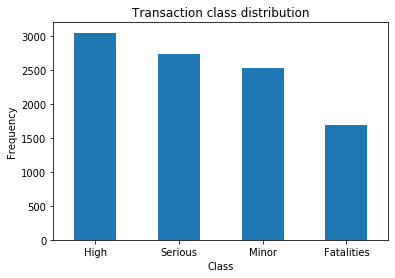

In [657]:
count_classes = pd.value_counts(train_df['Severity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
LABELS = ["High", "Serious","Minor","Fatalities"]
plt.xticks(range(4), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");


In [658]:
train_df["Class"]=train_df.Severity.map({'Highly_Fatal_And_Damaging':1,'Significant_Damage_And_Serious_Injuries':2,'Minor_Damage_And_Injuries':3,'Significant_Damage_And_Fatalities':4})

In [659]:
train_df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Class
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570,3
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128,3
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181,4
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946,2
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054,4


In [660]:
train_df.drop('Severity',axis=1,inplace=True)

In [661]:
train_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Class
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570,3
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128,3
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181,4
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946,2
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054,4


In [662]:
train_df.drop('Accident_ID',axis=1,inplace=True)

In [663]:
train_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Class
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,3
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,3
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,4
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,2
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,4


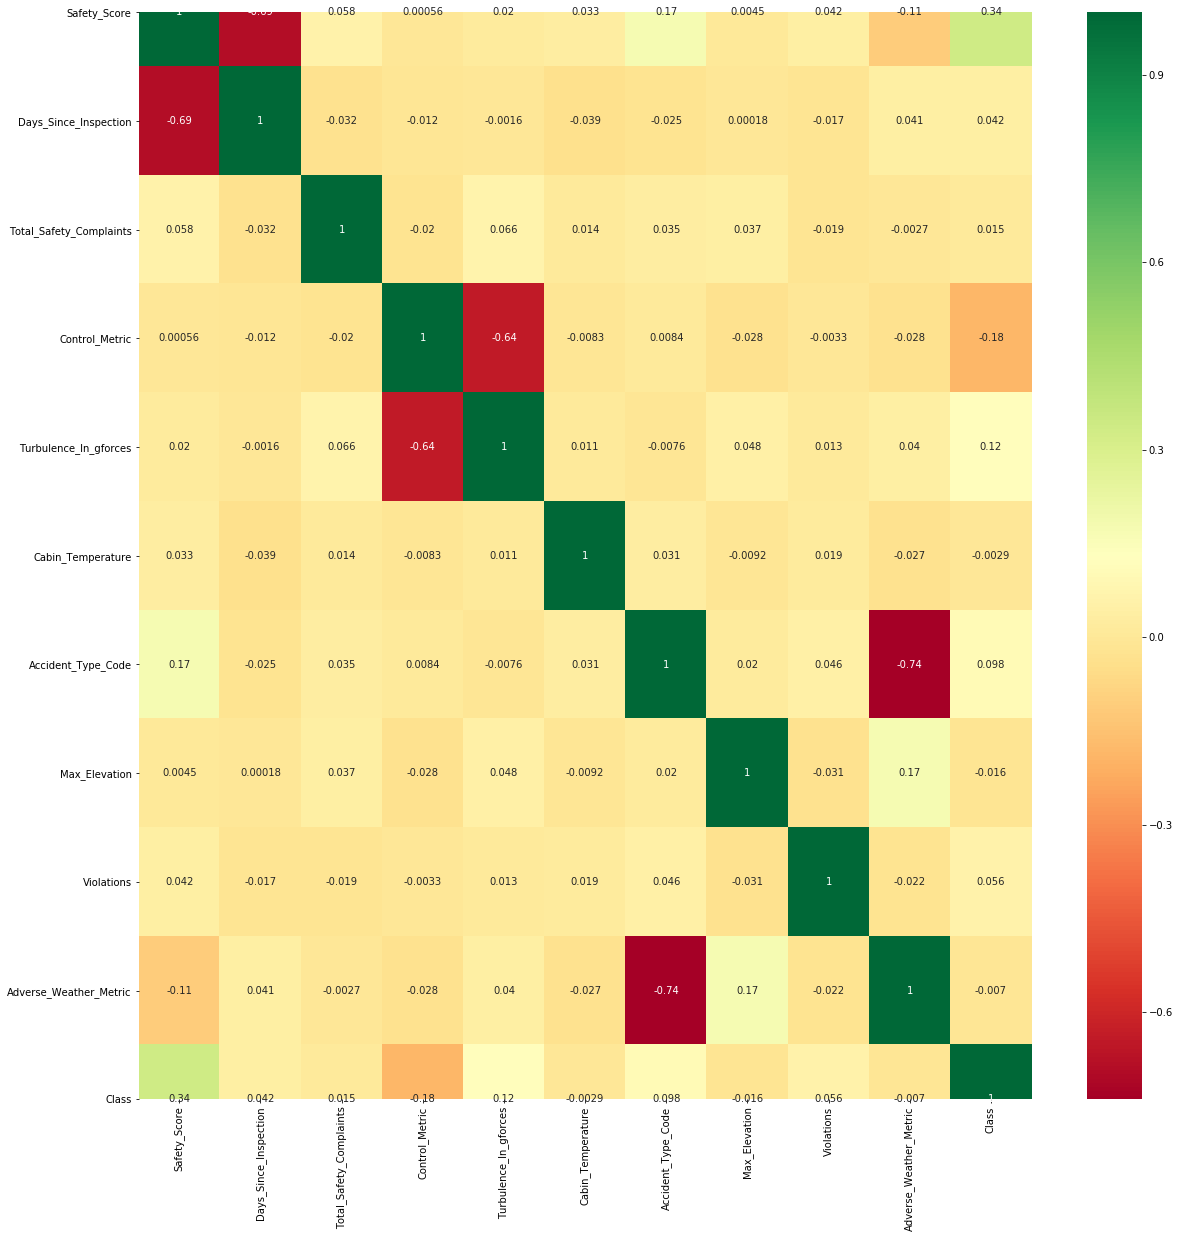

In [664]:
X_train = train_df.iloc[:,0:10]  #independent columns
Y_train = train_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [665]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size =0.3, random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7000, 10)
(7000,)
(3000, 10)
(3000,)


In [667]:
decision_tree = DecisionTreeClassifier(max_depth=12)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [669]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)
Y_pred = decision_tree.predict(X_test)
results = confusion_matrix(Y_test, Y_pred)
print('confusion matrix :\n',results)
print('\n',classification_report(Y_test, Y_pred))

98.63
confusion matrix :
 [[835  24  25  21]
 [ 20 782  35   6]
 [ 22  19 684  33]
 [ 19   9  22 444]]

               precision    recall  f1-score   support

           1       0.93      0.92      0.93       905
           2       0.94      0.93      0.93       843
           3       0.89      0.90      0.90       758
           4       0.88      0.90      0.89       494

    accuracy                           0.92      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000



In [670]:
test_df = pd.read_csv('test.csv')

In [671]:
test_df.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [672]:
X_test= test_df.iloc[:,0:10]

In [673]:
X_test.shape

(2500, 10)

In [674]:
Y_pred = decision_tree.predict(X_test)

In [675]:
Y_pred.shape

(2500,)

In [676]:
pd.DataFrame({'Accident_ID':test_df.Accident_ID,'Severity':Y_pred}).set_index('Accident_ID').to_csv('submission.csv')

In [677]:
sub = pd.read_csv('submission.csv')

In [678]:
sub.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities
